In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def riemann_dist(corrmat, corrmat2):
  dst = np.sqrt( # 6. compute the squareroot of the sum
      np.sum( # 5. sum the squared log-eigenvalues
          np.log( # 3. compute the log of each eigenvalue 
              np.linalg.eigvals( # 2. calculate the eigenvalues
                  np.linalg.inv(corrmat)*corrmat2  # 1. compute (C1)^(-1) * (C2)
              )
          )**2 # 4. square the eigenvalue logarithms
      )
  )
  return dst

In [106]:
vec_size = 20
sigma = 0.1
X = np.random.random(size=vec_size)
Y, Z= X, X
var_vect = [X,-Y,Z]

In [107]:
corr_0 = np.corrcoef(var_vect)
corrmats = [
    np.array([corr_0[0,1], corr_0[0,2], corr_0[1,2]])
]
norms_eps = [0]
corr_dist_euclid = [0]
corr_dist_riemm = [0,0]

In [108]:
num_iters = 100
prev_corrmat = corr_0
for i in range(num_iters):
  indx = i%3   # sum to each variable in turn
  eps = np.random.normal(loc=0, scale= sigma, size=vec_size)  # generate perturbation vector
  var_vect[indx] = var_vect[indx] + eps # add perturbation
  corrmat = np.corrcoef(var_vect) # compute correlation matrix
  corrmat_offdiag = np.array([corrmat[0,1], corrmat[0,2], corrmat[1,2]]) # get off-diagonal elements
  corr_dist_euclid.append(
      np.linalg.norm(
          corrmats[i]-corrmat_offdiag # get euclidean distance between the two successive corr matrices
      )
  )
  if i != 0:
    corr_dist_riemm.append(
        riemann_dist(corrmat,prev_corrmat)
    )
  corrmats.append(corrmat_offdiag) # save the off-diag elements
  norms_eps.append(np.linalg.norm(eps)) # save the norm of the perturbation
  prev_corrmat = corrmat

In [109]:
corrmats_array = np.array(corrmats)

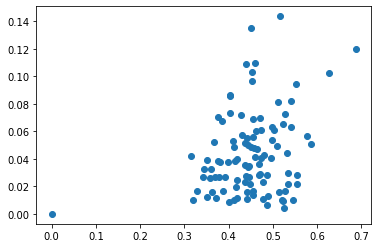

In [110]:
plt.scatter(norms_eps, corr_dist_euclid)

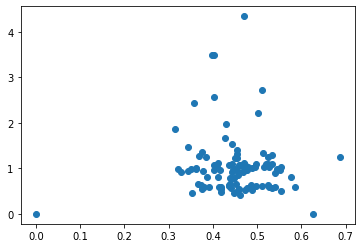

In [111]:
plt.scatter(norms_eps, corr_dist_riemm)

In [112]:
xs = corrmats_array[:,0]
ys = corrmats_array[:,1]
zs = corrmats_array[:,2]

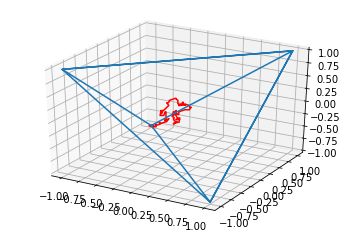

In [113]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(xs, ys, zs, marker='o')
ax.plot(xs,ys,zs, color='r')
ax.plot([1,1,-1,-1,-1,1,1,-1,1,-1],[1,-1,1,-1,-1,1,-1,-1,1,1],[1,-1,-1,1,1,1,-1,1,1,-1])

In [115]:
def gen_paths(sign = [1,1,1], vec_size = 20, sigma= 0.1, num_iters = 100):
  X = np.random.random(size=vec_size)
  Y, Z= X, X
  var_vect = [sign[0]*X,sign[1]*Y,sign[2]*Z]
  corr_0 = np.corrcoef(var_vect)
  corrmats = [
      np.array([corr_0[0,1], corr_0[0,2], corr_0[1,2]])
  ]
  norms_eps = [0]
  corr_dist_euclid = [0]
  corr_dist_riemm = [0,0]
  prev_corrmat = corr_0
  for i in range(num_iters):
    indx = i%3   # sum to each variable in turn
    eps = np.random.normal(loc=0, scale= sigma, size=vec_size)  # generate perturbation vector
    var_vect[indx] = var_vect[indx] + eps # add perturbation
    corrmat = np.corrcoef(var_vect) # compute correlation matrix
    corrmat_offdiag = np.array([corrmat[0,1], corrmat[0,2], corrmat[1,2]]) # get off-diagonal elements
    corr_dist_euclid.append(
        np.linalg.norm(
            corrmats[i]-corrmat_offdiag # get euclidean distance between the two successive corr matrices
        )
    )
    if i != 0:
      corr_dist_riemm.append(
          riemann_dist(corrmat,prev_corrmat)
      )
    corrmats.append(corrmat_offdiag) # save the off-diag elements
    norms_eps.append(np.linalg.norm(eps)) # save the norm of the perturbation
    prev_corrmat = corrmat

  return np.array(corrmats), norms_eps, corr_dist_euclid, corr_dist_riemm

In [116]:
corrmats, norms_eps, corr_dist_euclid, corr_dist_riemm = gen_paths()

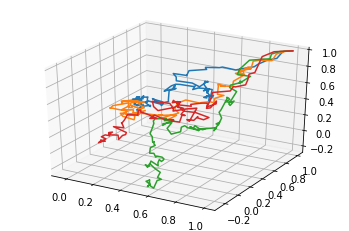

In [128]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(xs, ys, zs, marker='o')
#ax.plot([1,1,-1,-1,-1,1,1,-1,1,-1],[1,-1,1,-1,-1,1,-1,-1,1,1],[1,-1,-1,1,1,1,-1,1,1,-1])
norms = []
d_euc = []
d_riem = []
run = []
for i in range(4):
  corrmats, norms_eps, corr_dist_euclid, corr_dist_riemm = gen_paths()
  norms.append(norms_eps)
  d_euc.append(corr_dist_euclid)
  d_riem.append(corr_dist_riemm)
  run.append([i]*len(norms_eps))
  ax.plot(corrmats[:,0],corrmats[:,1],corrmats[:,2])

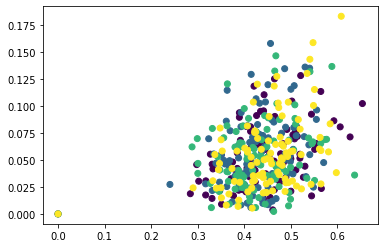

In [133]:
plt.scatter(norms, d_euc, c=run )